In [506]:
# Predict Password Strength using Natural Language Processing

In [507]:
# STEPS
# Topic Understanding
# Data Collection
# Data Cleaning
# Data Analysis
# Feature Engineering
# Model Building

In [508]:
# Business Understanding
# Strength - three values(0 , 1 , 2) i.e. 0 for weak, 1 for medium, 2 for strong..

In [509]:
## importing all necessary libraries ..

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [510]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

# Data Collection

In [511]:
# Data Colletcion

In [512]:
# ıf you do not want to deal with SQL
data = pd.read_csv("C:/Users/User/OneDrive/Desktop/Test2/data.csv", error_bad_lines=False)

Skipping line 2810: expected 2 fields, saw 5
Skipping line 4641: expected 2 fields, saw 5
Skipping line 7171: expected 2 fields, saw 5
Skipping line 11220: expected 2 fields, saw 5
Skipping line 13809: expected 2 fields, saw 5
Skipping line 14132: expected 2 fields, saw 5
Skipping line 14293: expected 2 fields, saw 5
Skipping line 14865: expected 2 fields, saw 5
Skipping line 17419: expected 2 fields, saw 5
Skipping line 22801: expected 2 fields, saw 5
Skipping line 25001: expected 2 fields, saw 5
Skipping line 26603: expected 2 fields, saw 5
Skipping line 26742: expected 2 fields, saw 5
Skipping line 29702: expected 2 fields, saw 5
Skipping line 32767: expected 2 fields, saw 5
Skipping line 32878: expected 2 fields, saw 5
Skipping line 35643: expected 2 fields, saw 5
Skipping line 36550: expected 2 fields, saw 5
Skipping line 38732: expected 2 fields, saw 5
Skipping line 40567: expected 2 fields, saw 5
Skipping line 40576: expected 2 fields, saw 5
Skipping line 41864: expected 2 field

In [513]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [514]:
data.shape

(669640, 2)

# Data Cleaning

In [515]:
# Data Cleaning
data.columns

Index(['password', 'strength'], dtype='object')

In [516]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [517]:
# Check if we have duplicate data or duplicate rows .
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
669635    False
669636    False
669637    False
669638    False
669639    False
Length: 669640, dtype: bool

In [518]:
data.duplicated().sum()

0

In [519]:
# check missing values in columns

In [520]:
data.isnull()

,password,strength
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
669635,False,False
669636,False,False
669637,False,False
669638,False,False


In [521]:
data.isnull().any()

password     True
strength    False
dtype: bool

In [522]:
data.isnull().any().sum()

1

In [523]:
# check data-types of every feature 

In [524]:
data.dtypes

password    object
strength     int64
dtype: object

In [525]:
# checking whether "strength" feature has irelevant or relevant values or not 

In [526]:
data["strength"]

0         1
1         1
2         1
3         1
4         1
         ..
669635    1
669636    1
669637    1
669638    1
669639    1
Name: strength, Length: 669640, dtype: int64

In [527]:
data["strength"].unique()
# irrevelant valeus yoktur.

array([1, 2, 0], dtype=int64)

# Semantic Analysis 

In [528]:
# Semantic Analysis It refers to the process of understanding and inferring the meaning of texts or text content. Semantic analysis concerns the ability to understand and interpret the semantic content of texts beyond text.

In [529]:
data.columns

Index(['password', 'strength'], dtype='object')

In [530]:
data["password"]

0             kzde5577
1             kino3434
2            visi7k1yr
3             megzy123
4          lamborghin1
              ...     
669635      10redtux10
669636       infrared1
669637    184520socram
669638       marken22a
669639        fxx4pw4g
Name: password, Length: 669640, dtype: object

In [531]:
data["password"][0]

'kzde5577'

In [532]:
type(data["password"][0])
# We see that it is of string type
# So we can operate with string functions

str

In [533]:
# Ask some questions to do semantic analysis

In [534]:
# 1-) How many password textual actually holds only numeric characters ?

In [535]:
data["password"].str

In [536]:
data["password"].str.isnumeric()

0         False
1         False
2         False
3         False
4         False
          ...  
669635    False
669636    False
669637    False
669638    False
669639    False
Name: password, Length: 669640, dtype: object

In [537]:
data["password"].str.isnumeric().sum()

108

In [538]:
data[data["password"].notna() & data["password"].str.isnumeric()]
# Checking which of my data consists of passwords containing only numbers.

,password,strength
5597,445566,0
6263,1995151,0
27970,5252752,0
34293,2091024,0
41338,603030,0
...,...,...
634830,000000,0
635587,11,0
649848,1050,0
652957,363761,0


In [539]:
data[data["password"].notna() & data["password"].str.isnumeric()].shape
# In this way, we can see how many passwords contain only numeric characters.

(108, 2)

In [540]:
# 2-) How many password textual actually holds only Upper-case character ?

In [541]:
data["password"].str.isupper()
# The isupper function checks whether all uppercase characters in a string are uppercase.

0         False
1         False
2         False
3         False
4         False
          ...  
669635    False
669636    False
669637    False
669638    False
669639    False
Name: password, Length: 669640, dtype: object

In [542]:
data["password"].str.isupper().sum()

10477

In [543]:
data[data["password"].notna() & data["password"].str.isupper()]

,password,strength
268,AS0130066,1
269,QWERTY0011,1
323,YADHJIGSAWS11,1
346,IRZA98,0
486,PEPITO00,1
...,...,...
669458,ARNAV_KUSHI,1
669460,36802907A,1
669549,MARLENY2090,1
669557,RHBDJQHJU25,1


In [544]:
data[data["password"].notna() & data["password"].str.isupper()].shape

(10477, 2)

In [545]:
# 3-) How many password textual actually holds only alphabet

In [546]:
data["password"].str.isalpha()

0         False
1         False
2         False
3         False
4         False
          ...  
669635    False
669636    False
669637    False
669638    False
669639    False
Name: password, Length: 669640, dtype: object

In [547]:
data["password"].str.isalpha().sum()

330

In [548]:
data[data["password"].notna() & data["password"].str.isalpha()]

,password,strength
231,gtlek,0
4602,trcske,0
6096,jijik,0
6500,piccolo,0
10740,Stphane,0
...,...,...
656049,vntm,0
657578,fuckyou,0
666278,mueco,0
666328,PomarancaÇ,1


In [549]:
data[data["password"].notna() & data["password"].str.isalpha()].shape

(330, 2)

In [550]:
# 4-)  How many password textual actually holds alpha-numeric character ?

In [551]:
data["password"].str.isalnum()

0         True
1         True
2         True
3         True
4         True
          ... 
669635    True
669636    True
669637    True
669638    True
669639    True
Name: password, Length: 669640, dtype: object

In [552]:
data["password"].str.isalnum().sum()

650892

In [553]:
data[data["password"].notna() & data["password"].str.isalnum()]

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


In [554]:
data[data["password"].notna() & data["password"].str.isalnum()].shape

(650892, 2)

In [555]:
# 5-) How many password textual actually holds title-case character ?

In [556]:
data["password"].str.istitle()

0         False
1         False
2         False
3         False
4         False
          ...  
669635    False
669636    False
669637    False
669638    False
669639    False
Name: password, Length: 669640, dtype: object

In [557]:
data["password"].str.istitle().sum()

6287

In [558]:
data[data["password"].notna() & data["password"].str.istitle()]

,password,strength
65,Iamthelegend1!,2
369,Staterkom20081993,2
377,Oshity07142014,2
464,Scipio21152030067254,2
546,1A2Z3E4R,1
...,...,...
669079,Kustyk33935432,2
669157,28091974Zezinho,2
669199,City&Colour241091,2
669233,Codificando10~,2


In [559]:
data[data["password"].notna() & data["password"].str.istitle()].shape

(6287, 2)

In [560]:
# 6-) How many password textual actually holds special character ?

In [561]:
# There is no special function for this, so we will create the function ourselves

In [562]:
data["password"]

0             kzde5577
1             kino3434
2            visi7k1yr
3             megzy123
4          lamborghin1
              ...     
669635      10redtux10
669636       infrared1
669637    184520socram
669638       marken22a
669639        fxx4pw4g
Name: password, Length: 669640, dtype: object

In [563]:
import string

In [564]:
string.punctuation ## all punctuations defined in "string" package !

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [565]:
# Coding a function that returns 1 if it contains a special character

def find_semantics(password):
    if pd.isna(password):
        return None  # or any other value you prefer for NaN
    for char in password:
        if char in string.punctuation:
            return 1
    return 0

In [566]:
data["password"].apply(find_semantics)
#This code applies each value in the "password" column to a function called find_semantics. That is, each value in the "password" column is passed as a parameter to the find_semantics function and replaced with the return value of that function.

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
669635    0.0
669636    0.0
669637    0.0
669638    0.0
669639    0.0
Name: password, Length: 669640, dtype: float64

In [567]:
data["password"].apply(find_semantics)==1
# This code applies each value in the "password" column to the find_semantics function and then compares the results to 1.


0         False
1         False
2         False
3         False
4         False
          ...  
669635    False
669636    False
669637    False
669638    False
669639    False
Name: password, Length: 669640, dtype: bool

In [568]:
data[data["password"].apply(find_semantics)==1]

,password,strength
20,elyass15@ajilent-ci,2
22,klara-tershina3H,2
44,olmaz.,0
50,ok>bdk,0
60,khmer100.03278&?><Mnb,2
...,...,...
669554,gRAPEHORSE_289,2
669606,Felidae_blckPanther001,2
669618,juanpaganini588@gmail.com,2
669622,weslley.06888524,2


In [569]:
(data["password"].apply(find_semantics)==1).sum()

17893

In [570]:
data[data["password"].apply(find_semantics)==1].shape

(17893, 2)

# Feature Engineering

In [571]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [572]:
# length of every Password

In [573]:
data["password"]

0             kzde5577
1             kino3434
2            visi7k1yr
3             megzy123
4          lamborghin1
              ...     
669635      10redtux10
669636       infrared1
669637    184520socram
669638       marken22a
669639        fxx4pw4g
Name: password, Length: 669640, dtype: object

In [574]:
data["password"][0]

'kzde5577'

In [575]:
len(data["password"][0])

8

In [576]:
data["password"].str.len()

0          8.0
1          8.0
2          9.0
3          8.0
4         11.0
          ... 
669635    10.0
669636     9.0
669637    12.0
669638     9.0
669639     8.0
Name: password, Length: 669640, dtype: float64

In [577]:
data["length"] = data["password"].str.len()
data["length"]

0          8.0
1          8.0
2          9.0
3          8.0
4         11.0
          ... 
669635    10.0
669636     9.0
669637    12.0
669638     9.0
669639     8.0
Name: length, Length: 669640, dtype: float64

In [578]:
# Frequency of Lowercase Characters :

In [579]:
password = "Burak23"
# I will understand the functions through this example password.

In [580]:
[char for char in password if char.islower()]

['u', 'r', 'a', 'k']

In [581]:
len([char for char in password if char.islower()])

4

In [582]:
len([char for char in password if char.islower()]) / len(password)

0.5714285714285714

In [583]:
# Why do we set the number of lowercase letters / password length?
# The purpose of this is to calculate how much of the password consists of lowercase characters by proportioning the total length of lowercase characters in a given "password" character string to the total length of the password. That is, it is used to calculate the upper-lower case ratio of the password.
# As for why this calculation is divided by length, this is to convert the ratio to a value between 0 and 1. No matter the length of the password, this ratio will always be between 0 and 1. Closer to 1, the password contains more lowercase letters, while closer to 0, it contains more uppercase letters, numbers, or symbols.
# In other words, we are actually normalizing and getting rid of the outliers since we set them between 0-1.
# In other words, if the value of the "lowercase_freq" variable I created below approaches 1, there are more lowercase letters; If the value of the "uppercase_freq" variable approaches 1, we can say that there are more uppercase letters.

In [584]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

In [585]:
# Frequency of Uppercase Characters

In [586]:
[char for char in password if char.isupper()]

['B']

In [587]:
len([char for char in password if char.isupper()])

1

In [588]:
len([char for char in password if char.islower()]) / len(password)

0.5714285714285714

In [589]:
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

In [590]:
# Frequency of Numeric Characters 

In [591]:
[char for char in password if char.isdigit()]

['2', '3']

In [592]:
len([char for char in password if char.isdigit()])

2

In [593]:
len([char for char in password if char.isdigit()]) / len(password)

0.2857142857142857

In [594]:
def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [595]:
def freq_lowercase(password):
    if pd.isna(password):
        return np.nan  # or any other value you prefer for NaN
    return len([char for char in password if char.islower()]) / len(password) if len(password) > 0 else 0

def freq_uppercase(password):
    if pd.isna(password):
        return np.nan
    return len([char for char in password if char.isupper()]) / len(password) if len(password) > 0 else 0

def freq_numerical_case(password):
    if pd.isna(password):
        return np.nan
    return len([char for char in password if char.isdigit()]) / len(password) if len(password) > 0 else 0


data["lowercase_freq"] = np.round(data["password"].apply(freq_lowercase) , 3)

data["uppercase_freq"] = np.round(data["password"].apply(freq_uppercase) , 3)

data["digit_freq"] = np.round(data["password"].apply(freq_numerical_case) , 3)

In [596]:
# Frequency of Special-case Characters 

In [597]:
# A more complex function for special characters because there is no function here that can find characters with a single function like isupper function

In [598]:
def freq_special_case(row):
    special_chars = [] 
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)

In [599]:
def freq_special_case(password):
    if pd.isna(password):
        return np.nan  # or any other value you prefer for NaN
    special_chars = [char for char in password if not char.isalpha() and not char.isdigit()]
    return len(special_chars) / len(password) if len(password) > 0 else 0

data["special_char_freq"] = np.round(data["password"].apply(freq_special_case) , 3) ## applying "freq_special_case" function

In [600]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,kzde5577,1,8.0,0.500,0.0,0.500,0.0
1,kino3434,1,8.0,0.500,0.0,0.500,0.0
2,visi7k1yr,1,9.0,0.778,0.0,0.222,0.0
3,megzy123,1,8.0,0.625,0.0,0.375,0.0
4,lamborghin1,1,11.0,0.909,0.0,0.091,0.0


In [601]:
data["special_char_freq"] = data["special_char_freq"]/data["length"] ## noromalising "special_char_freq" feature 

In [602]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,kzde5577,1,8.0,0.500,0.0,0.500,0.0
1,kino3434,1,8.0,0.500,0.0,0.500,0.0
2,visi7k1yr,1,9.0,0.778,0.0,0.222,0.0
3,megzy123,1,8.0,0.625,0.0,0.375,0.0
4,lamborghin1,1,11.0,0.909,0.0,0.091,0.0


# Data Analysis

In [603]:
# Data Analysis
# Performing Descriptive Statistics
# mean,median,minimu,max etc.

In [604]:
# What are the maximum , minimum , mean and median value of the strength according to length,lowercase_freq , uppercase_freq , digit_freq ?

In [605]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [606]:
# "length" - "Strength" Analysis

In [607]:
data[["length" , "strength"]]

,length,strength
0,8.0,1
1,8.0,1
2,9.0,1
3,8.0,1
4,11.0,1
...,...,...
669635,10.0,1
669636,9.0,1
669637,12.0,1
669638,9.0,1


In [608]:
data[["length" , "strength"]].groupby("strength").agg(["min", "max" , "mean" , "median"])

length                         
            min    max       mean median
strength                                
0           1.0    7.0   6.549604    7.0
1           8.0   13.0   9.618964    9.0
2          14.0  220.0  15.932497   16.0

In [609]:
cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq']
for col in cols:
    print(col)
    print(data[[col , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"]))
    print('\n')
#Comment
# Higher the length, Higher the strength
# In case on alphabet frequency higher is not better.
# On an average , 42% of characters are lowercase for higher strength 
# so that we can say when the  number of lower characters increases then strength of password will decrease

length
         length                         
            min    max       mean median
strength                                
0           1.0    7.0   6.549604    7.0
1           8.0   13.0   9.618964    9.0
2          14.0  220.0  15.932497   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708594  0.714
1                   0.0  0.923  0.629739  0.667
2                   0.0  0.933  0.422641  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012335  0.000
1                   0.0  0.923  0.008456  0.000
2                   0.0  0.905  0.367294  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                            

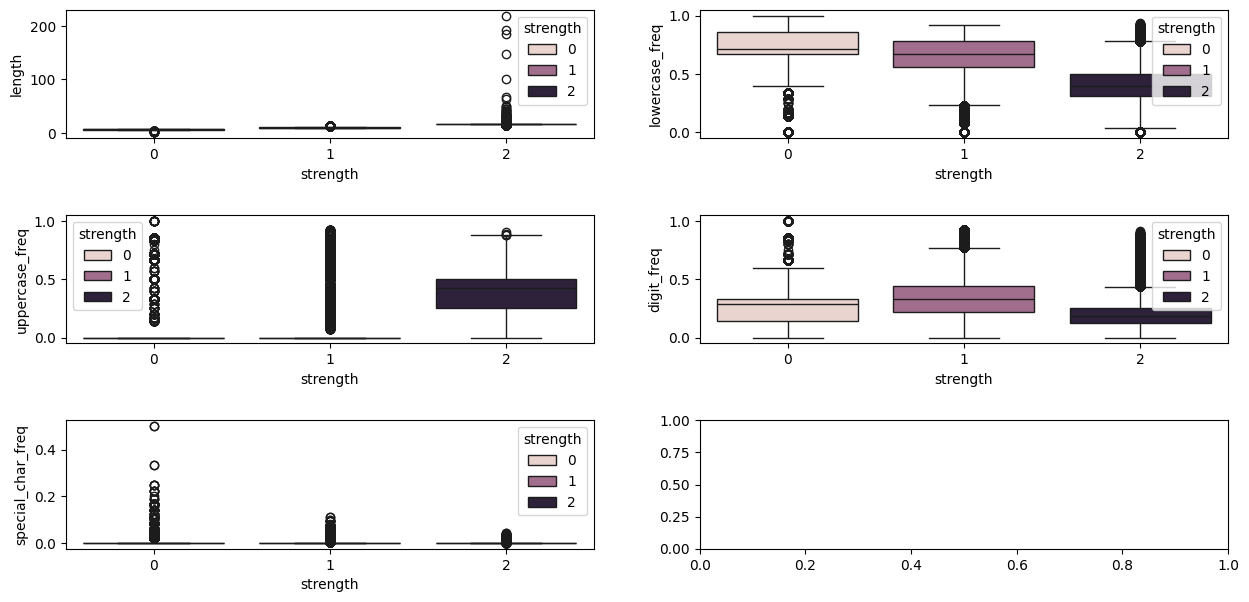

In [610]:
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5,ax6)) = plt.subplots(3 , 2 , figsize=(15,7))

sns.boxplot(x="strength" , y='length' , hue="strength" , ax=ax1 , data=data)
sns.boxplot(x="strength" , y='lowercase_freq' , hue="strength" , ax=ax2, data=data)
sns.boxplot(x="strength" , y='uppercase_freq' , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y='digit_freq' , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y='special_char_freq' , hue="strength" , ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)

In [611]:
#  comment
# Higher Lowercase frequency is seen in low strength passwords
# For higher strength passwords ,  Lowercase frequency can be high too but that is probably effect of length.
#In digit_freq there is a split of majority poplutation of strength 1 and 2  but for 0 and 1 strength , there is overlap so no too much to say there. But we can say a nicely propotioned password is good..

# Feature Importance

In [612]:
data[data['strength']==0]

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
21,intel1,0,6.0,0.833,0.0,0.167,0.000000
35,lsdlsd1,0,7.0,0.857,0.0,0.143,0.000000
44,olmaz.,0,6.0,0.833,0.0,0.000,0.027833
50,ok>bdk,0,6.0,0.833,0.0,0.000,0.027833
58,d04m11,0,6.0,0.333,0.0,0.667,0.000000
...,...,...,...,...,...,...,...
669572,o3kkmwz,0,7.0,0.857,0.0,0.143,0.000000
669573,yenni91,0,7.0,0.714,0.0,0.286,0.000000
669593,vehlfb8,0,7.0,0.857,0.0,0.143,0.000000
669608,mo1152,0,6.0,0.333,0.0,0.667,0.000000


In [613]:
data[data['strength']==0]["length"]

21        6.0
35        7.0
44        6.0
50        6.0
58        6.0
         ... 
669572    7.0
669573    7.0
669593    7.0
669608    6.0
669634    6.0
Name: length, Length: 89702, dtype: float64

In [614]:
def get_dist(data , feature):
    
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    # 1 row
    # 2 column
    
    # violinplot
    sns.violinplot(x='strength' , y=feature , data=data )
    
    plt.subplot(1,2,2)
    
    sns.distplot(data[data['strength']==0][feature] , color="red" , label="0" , hist=False)
    sns.distplot(data[data['strength']==1][feature], color="blue", label="1", hist=False)
    sns.distplot(data[data['strength']==2][feature], color="orange", label="2", hist=False)
    
    plt.legend()
    plt.show()

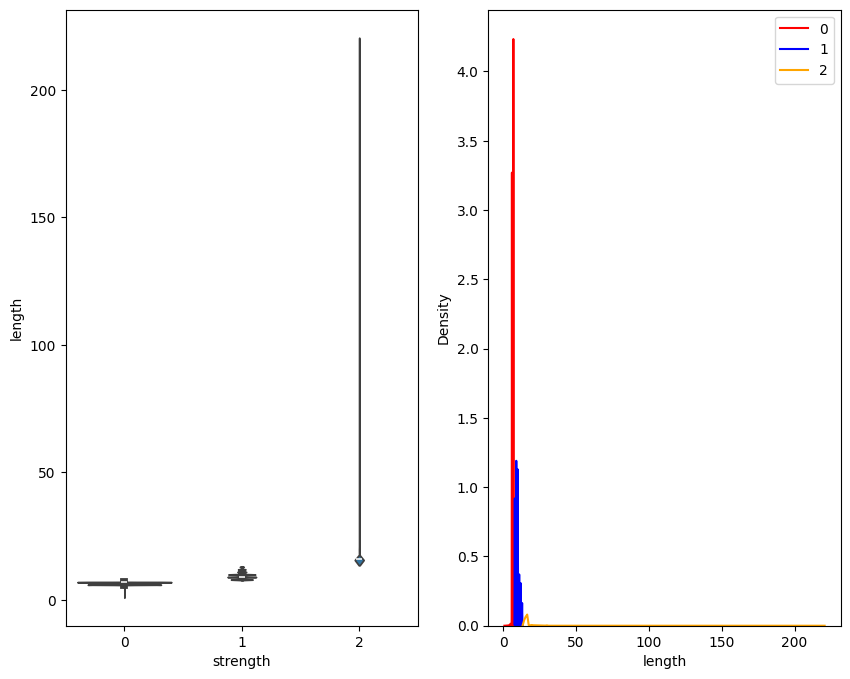

In [615]:
get_dist(data , "length")
# we have few overlappping region in distribution plot 

# when class is 2 , we have higher value of 'length' than class 1 & class 0

# it means 'length' is a interesting feature as we have very less overlapping region

# similarly from violinplot ,we will say on account of less overlappping ,this feature 'length' is amazing & useful in determining the strength

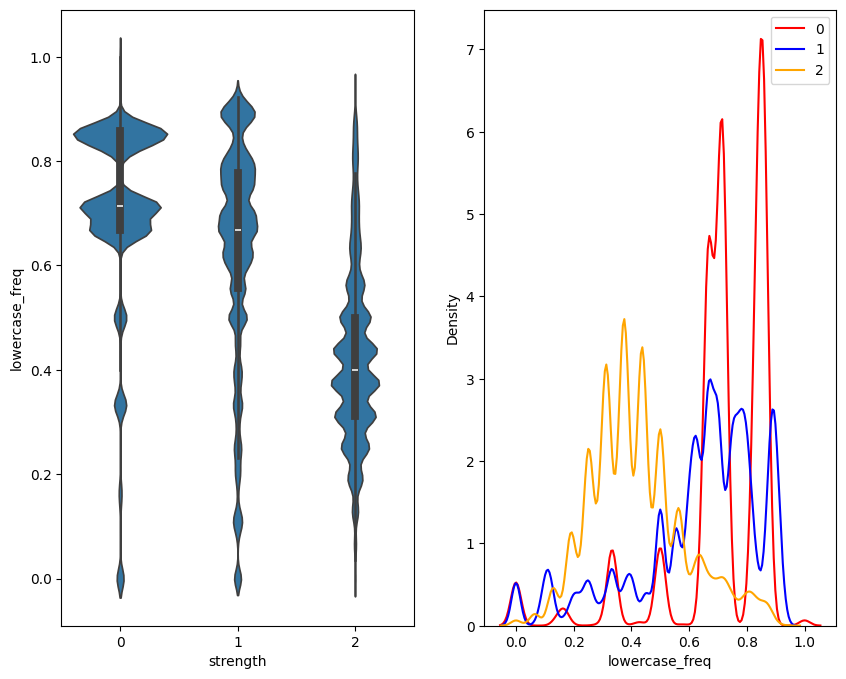

In [616]:
get_dist(data , 'lowercase_freq')

# distribution plot
# we have some kind of overlappping region in distribution plot 

# when class is 2 , we have less value of 'lower_freq' than class 1 & class 0

# it means 'lower_freq' is an important feature

# violinplot
# similarly from violinplot ,we will say on account of such overlappping , 
# when class is 2 we have less value of 'lower_freq' than class 1 & class 0

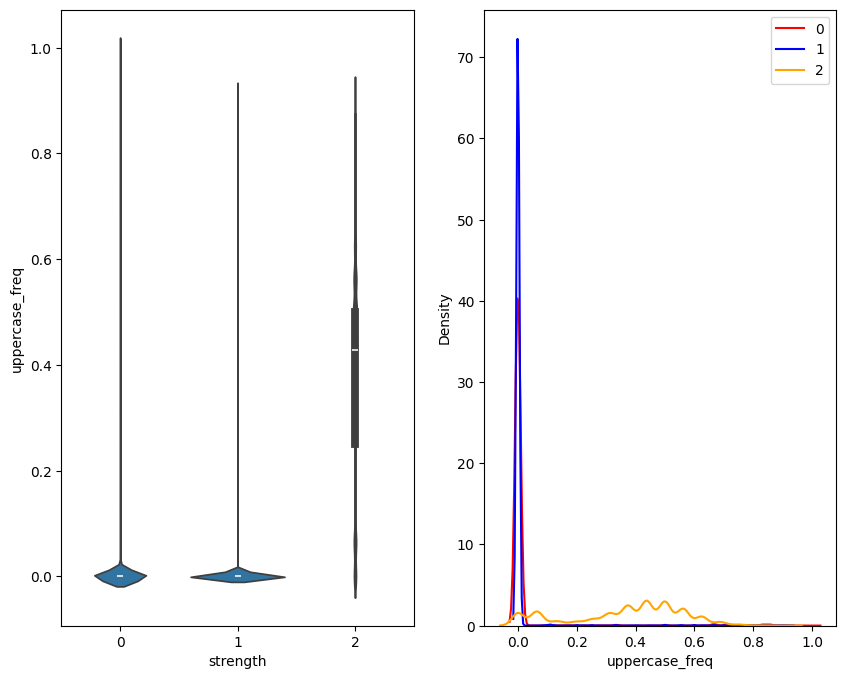

In [617]:
get_dist(data , 'uppercase_freq')

# distribution plot 
# we have quite high overlappping region in distribution plot

# it means 'upper_freq' is not that much important feature.

# violinplot
## similarly from violinplot ,we will say on account of such huge overlappping , 

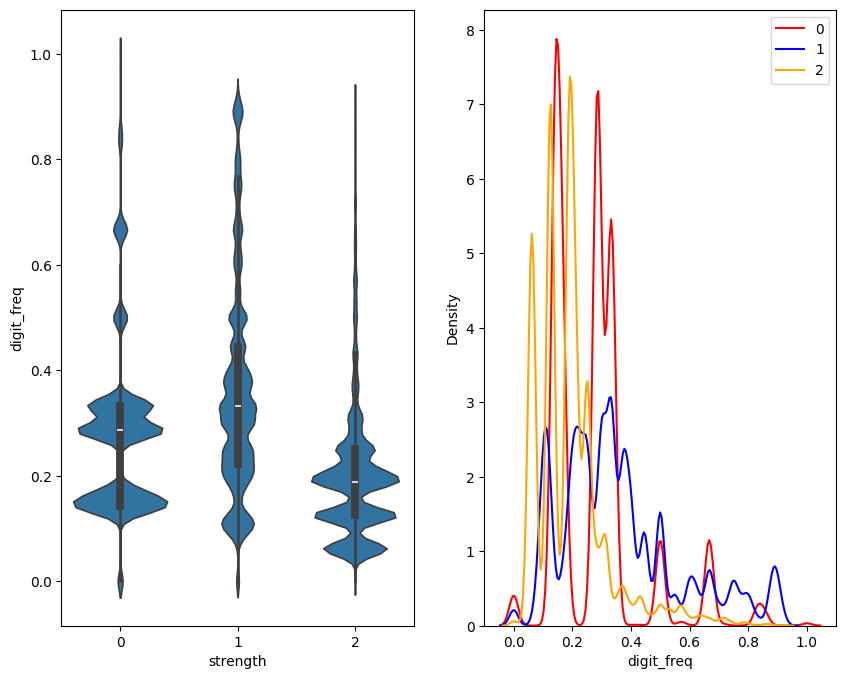

In [618]:
get_dist(data , 'digit_freq')
# we have quite high overlappping region in distribution plot 
# 'upper_freq' is not that much important feature

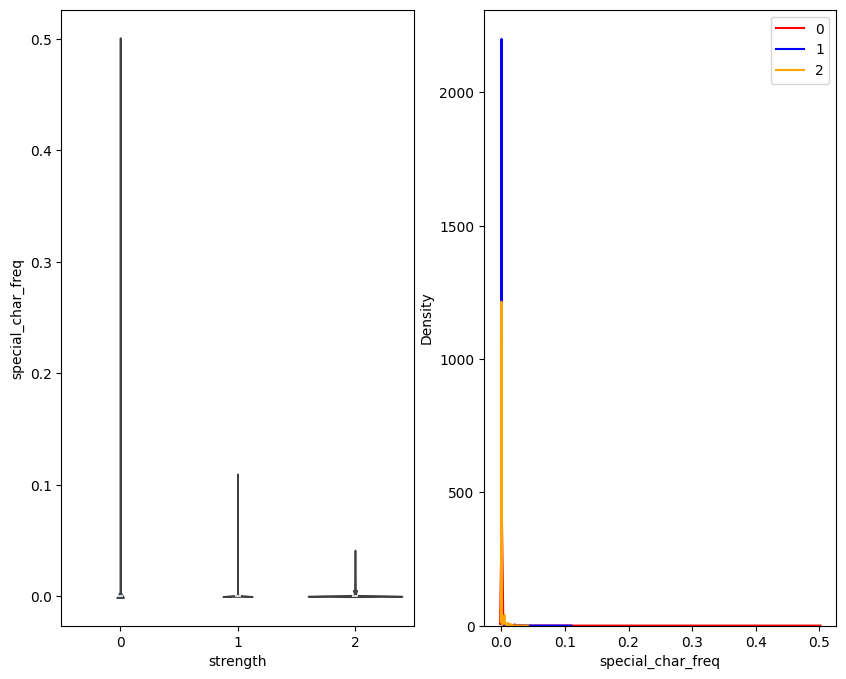

In [619]:
get_dist(data , 'special_char_freq')

In [620]:
# In summary, I determined the lower_freq and length variables as important variables.
# I will continue my journey using the new variables I created.

# Apply TF-IDF on data

In [621]:
# TF-IDF -> Term Frequency-Inverse Document Frequency

#TF-IDF is an abbreviation for the concept of "Term Frequency-Inverse Document Frequency" and is a text mining method used in fields such as natural language processing (NLP) and text mining.
#This method is used to evaluate the importance of words within documents and convert text data into numerical vectors.
#The main purpose of TF-IDF is to measure the importance of a word in a document within the overall document collection. This is done by taking into account how often a word occurs within a document (term frequency) and how rare the same word is in other documents (inverse document frequency).

# Term Frequency (TF - Term Frequency):
# Measures how often a word in a document appears within the document.
#Usually calculated by dividing the number of words by the total number of words in the document.
#High TF means a word occurs frequently within the document.

#Inverse Document Frequency (IDF):
#Measures how rare a word is among other documents.
#Rare words have higher IDF value.
#IDF is calculated by dividing the total number of documents within the document collection by the number of documents containing that word.

#TF-IDF Score:
#It is calculated by multiplying #TF and IDF values.
#The TF-IDF score of a word in a particular document reflects the importance of that word in the document.
#So, a word with high TF and high IDF will have a high TF-IDF score.

# TF-IDF is useful in text mining and information extraction applications because it converts text data into numerical vectors, making it easier to use machine learning algorithms
#Especially widely used in document classification, text classification, summarization, feature extraction and similar tasks

In [622]:
data.head()
# Here, the string values contained in the password variable cannot be understood by the ML algorithm.
# Represent the values contained in this password with numbers.

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,kzde5577,1,8.0,0.500,0.0,0.500,0.0
1,kino3434,1,8.0,0.500,0.0,0.500,0.0
2,visi7k1yr,1,9.0,0.778,0.0,0.222,0.0
3,megzy123,1,8.0,0.625,0.0,0.375,0.0
4,lamborghin1,1,11.0,0.909,0.0,0.091,0.0


In [623]:
# Convert this password feature into my vector representation.

In [624]:
data.sample(frac=1)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
317333,aGySENozEpOW824,2,15.0,0.333,0.467,0.200,0.0
600095,teacher222,1,10.0,0.700,0.000,0.300,0.0
523770,kx8h09cysp4w,1,12.0,0.667,0.000,0.333,0.0
375481,krupy123,1,8.0,0.625,0.000,0.375,0.0
130599,salla123,1,8.0,0.625,0.000,0.375,0.0
...,...,...,...,...,...,...,...
312273,berjuang45,1,10.0,0.800,0.000,0.200,0.0
657803,bazan1,0,6.0,0.833,0.000,0.167,0.0
530747,flamengo13,1,10.0,0.800,0.000,0.200,0.0
413606,cubichu101,1,10.0,0.700,0.000,0.300,0.0


In [625]:
dataframe = data.sample(frac=1)
dataframe

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
92422,veterok178,1,10.0,0.700,0.000,0.300,0.0
18978,gvtyruaxj05,1,11.0,0.818,0.000,0.182,0.0
651693,ywyduz380,1,9.0,0.667,0.000,0.333,0.0
234164,G145Nfhfynek13,2,14.0,0.500,0.143,0.357,0.0
444924,asdfvcxz123,1,11.0,0.727,0.000,0.273,0.0
...,...,...,...,...,...,...,...
190533,613iKePIDYGacI,2,14.0,0.286,0.500,0.214,0.0
618870,utrxswikq0,1,10.0,0.900,0.000,0.100,0.0
503436,4DVX3UTEyNA6mqE1,2,16.0,0.188,0.562,0.250,0.0
206051,visualbasic7,1,12.0,0.917,0.000,0.083,0.0


# Apply NLP

In [626]:
from sklearn.feature_extraction.text import TfidfVectorizer ## import TF-IDF vectorizer to convert text data into numerical data
import pandas as pd

In [627]:
vectorizer = TfidfVectorizer(analyzer="char")

In [628]:
list(dataframe["password"])

['veterok178',
 'gvtyruaxj05',
 'ywyduz380',
 'G145Nfhfynek13',
 'asdfvcxz123',
 'jpn092296',
 '9802140zha',
 'abdo852456',
 'bYTBqKDU1MQqh1Se',
 'cWur0BTk3OAsks9e',
 'secyq418',
 'megacumbia22',
 'windlass29',
 'kk225536',
 '750qyzItOcIBiTo',
 'Xt4rw85165wAqZ',
 'acfinuh84',
 'fcodbwulk2',
 'johna12',
 'hudderz23',
 '5bII5fzgzNgcAMQ7',
 'revyzyw582',
 'napoletano1',
 '5iusj1DkxNwrZD5d',
 'karina1234mal',
 'thesims25',
 'adri10076278',
 'britt69',
 'fucku958',
 'de5533602',
 'mulya654',
 'september2013',
 'bonfruit1',
 'netcafe1992',
 'pen20simfi',
 '1992perla',
 'jemerson10',
 'mavizy538',
 'bemohid29',
 'VexYuUzg4MAV9GkC',
 'svik3dsvik3d',
 'furikura88',
 'ng3ntot',
 'tribalwarspt1',
 'nwuO0TRMRN6g0Ob',
 'qws51ya',
 'djrhythm1',
 'ivanov46',
 'gaya1992',
 'wiki1990',
 'hern123salas',
 'pelagaton91',
 'acemhike21',
 'elmejor34',
 'genius133',
 'NONIqYzyZIV184',
 'ferdoots1',
 't234555667',
 '09876sall',
 'cityville1',
 '11Eiby3awoqvde',
 'gkonfer153',
 'j0safat',
 'reaction11',
 'kare

In [629]:
x = list(dataframe["password"].fillna(''))
x

['veterok178',
 'gvtyruaxj05',
 'ywyduz380',
 'G145Nfhfynek13',
 'asdfvcxz123',
 'jpn092296',
 '9802140zha',
 'abdo852456',
 'bYTBqKDU1MQqh1Se',
 'cWur0BTk3OAsks9e',
 'secyq418',
 'megacumbia22',
 'windlass29',
 'kk225536',
 '750qyzItOcIBiTo',
 'Xt4rw85165wAqZ',
 'acfinuh84',
 'fcodbwulk2',
 'johna12',
 'hudderz23',
 '5bII5fzgzNgcAMQ7',
 'revyzyw582',
 'napoletano1',
 '5iusj1DkxNwrZD5d',
 'karina1234mal',
 'thesims25',
 'adri10076278',
 'britt69',
 'fucku958',
 'de5533602',
 'mulya654',
 'september2013',
 'bonfruit1',
 'netcafe1992',
 'pen20simfi',
 '1992perla',
 'jemerson10',
 'mavizy538',
 'bemohid29',
 'VexYuUzg4MAV9GkC',
 'svik3dsvik3d',
 'furikura88',
 'ng3ntot',
 'tribalwarspt1',
 'nwuO0TRMRN6g0Ob',
 'qws51ya',
 'djrhythm1',
 'ivanov46',
 'gaya1992',
 'wiki1990',
 'hern123salas',
 'pelagaton91',
 'acemhike21',
 'elmejor34',
 'genius133',
 'NONIqYzyZIV184',
 'ferdoots1',
 't234555667',
 '09876sall',
 'cityville1',
 '11Eiby3awoqvde',
 'gkonfer153',
 'j0safat',
 'reaction11',
 'kare

In [630]:
X = vectorizer.fit_transform(x)

In [631]:
X.shape

(669640, 153)

In [632]:
dataframe["password"].shape

(669640,)

In [633]:
X
# X holds only vector(values)  , it doesnt hold any feature name

<669640x153 sparse matrix of type '<class 'numpy.float64'>'
	with 5645405 stored elements in Compressed Sparse Row format>

In [634]:
X.toarray() 
# This is array represenatation of entire password feature

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [635]:
X.toarray()[0] ## TF-IDF scores of Ist row
# This is a vector represantation of the first password

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.2197728 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33145398, 0.32326596, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.49707081, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.32763676, 0.        , 0.        , 0.        ,
       0.26118677, 0.        , 0.        , 0.28133822, 0.     

In [636]:
dataframe["password"]

92422           veterok178
18978          gvtyruaxj05
651693           ywyduz380
234164      G145Nfhfynek13
444924         asdfvcxz123
                ...       
190533      613iKePIDYGacI
618870          utrxswikq0
503436    4DVX3UTEyNA6mqE1
206051        visualbasic7
474374              boton1
Name: password, Length: 669640, dtype: object

In [637]:
vectorizer.get_feature_names_out()

array(['\x01', '\x02', '\x04', '\x05', '\x06', '\x08', '\x0e', '\x0f',
       '\x10', '\x11', '\x12', '\x13', '\x16', '\x17', '\x18', '\x19',
       '\x1b', '\x1c', '\x1d', '\x1e', ' ', '!', '"', '#', '$', '%', '&',
       '(', ')', '*', '+', '-', '.', '/', '0', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', ';', '<', '=', '>', '?', '@', '[', '\\', ']',
       '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
       'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w',
       'x', 'y', 'z', '{', '|', '}', '~', '\x7f', '\x81', '\x8d', '\xa0',
       '¡', '¢', '¤', '¦', '§', '¨', '«', '¯', '°', '±', '²', '³', '´',
       'µ', '¶', '·', '¹', 'º', '»', '¼', '½', '¾', '¿', '×', 'ß', 'à',
       'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'í', 'î', 'ï',
       'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', '÷', 'ù', 'ú', 'û', 'ü', 'ý',
       'þ', 'ÿ', 'œ', 'ƒ', '—', '‚', '‡', '…', '‹', '›', '™'],
      dtype=object)

In [638]:
len(vectorizer.get_feature_names_out())

153

In [639]:
df2 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())
df2

,,,,,,,,,,,...,ÿ,œ,ƒ,—,‚,‡,…,‹,›,™
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [640]:
df2.iloc[:, 20:50]


,,!,"""",#,$,%,&,(,),*,...,6,7,8,9,;,<,=,>,?,@
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.331454,0.323266,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.298660,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.262948,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.258840,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.274770,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Logistic Regression

In [641]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [642]:
df2["length"] = dataframe['length']
df2["lowercase_freq"] = dataframe['lowercase_freq']

In [643]:
# Fill NaN values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(df2)

df2.head()

,,,,,,,,,,,...,ƒ,—,‚,‡,…,‹,›,™,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.500
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.500
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.625
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.909


In [644]:
y = dataframe["strength"]

In [645]:
y

92422     1
18978     1
651693    1
234164    2
444924    1
         ..
190533    2
618870    1
503436    2
206051    1
474374    0
Name: strength, Length: 669640, dtype: int64

In [646]:
# split data into train & test

In [647]:
from sklearn.model_selection import train_test_split

In [648]:
X_train, X_test, y_train, y_test = train_test_split(X_train_imputed, y, test_size=0.20, random_state=42)

In [649]:
X_train.shape

(535712, 155)

In [650]:
y_train.shape

(535712,)

In [651]:
# Applying Logistic Regression

In [652]:
from sklearn.linear_model import LogisticRegression

In [653]:
clf = LogisticRegression(multi_class="multinomial")


In [654]:
clf.fit(X_train , y_train) #train model

LogisticRegression(multi_class='multinomial')

In [655]:
y_pred = clf.predict(X_test) ##  predict on X-Test data

In [656]:
y_pred

array([0, 1, 2, ..., 0, 1, 1], dtype=int64)

In [657]:
from collections import Counter

In [658]:
Counter(y_pred)

Counter({0: 9646, 1: 112145, 2: 12137})

# Make prediction with user-entered input

In [659]:
password = "%@123abcd"

In [660]:
sample_array = np.array([password])

In [661]:
sample_array

array(['%@123abcd'], dtype='<U9')

In [662]:
sample_matrix = vectorizer.transform(sample_array)

In [663]:
sample_matrix

<1x153 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [664]:
type(sample_matrix)

scipy.sparse._csr.csr_matrix

In [665]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.70797349, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.14584092, 0.16904218, 0.18928513, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.49406757,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14075804, 0.23564851, 0.22022428, 0.21249777,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [666]:
sample_matrix.toarray().shape

(1, 153)

In [667]:
# length_of_password
len(password)

9

In [668]:
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [669]:
# The value of the remaining 2 dimensions for this password
# length -> 4
# lower_case_freq -> 0.4444444444444444
# Add these values to 99-dimensional matrix and make it 101

In [670]:
np.append(sample_matrix.toarray() , (9, 0.444))

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.70797349, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.14584092, 0.16904218, 0.18928513, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.49406757,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.14075804, 0.23564851, 0.22022428, 0.21249777,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [671]:
np.append(sample_matrix.toarray() , (9,0.444)).shape

(155,)

In [672]:
np.append(sample_matrix.toarray(), (9, 0.444)).reshape(1, -1)
np.append(sample_matrix.toarray(), (9, 0.444)).reshape(1, -1)


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.70797349, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.14584092, 0.16904218, 0.18928513, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.49406757,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14075804, 0.23564851, 0.22022428, 0.21249777,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [673]:
np.append(sample_matrix.toarray(), (9, 0.444)).reshape(1, -1)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.70797349, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.14584092, 0.16904218, 0.18928513, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.49406757,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14075804, 0.23564851, 0.22022428, 0.21249777,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [674]:
new_matrix = np.append(sample_matrix.toarray(), [9, 0.444]).reshape(1, -1)

In [675]:
clf.predict(new_matrix)

array([0], dtype=int64)

In [678]:
import pickle

# Save the model to a file
model = 'C:/Users/user/OneDrive/Desktop/Test2/static/classification_model.pkl'
pickle.dump(clf, open(model, 'wb'))

In [676]:
def predict():
    password = input("")
    sample_array = np.array([password])

    sample_matrix = vectorizer.transform(sample_array)

    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()]) / len(password)

    new_matrix2 = np.append(sample_matrix.toarray(), [length_pass, length_normalised_lowercase]).reshape(1, -1)

    result = clf.predict(new_matrix2)

    if result == 0:
        return "Password is weak"
    elif result == 1:
        return "Password is normal"
    else:
        return "Password is strong"

In [686]:
predict()

'Password is strong'

# Model evaluation

In [679]:
# We will check Accuracy of your model using confusion_matrix, accuracy_score

In [680]:
from sklearn.metrics import confusion_matrix ,  accuracy_score , classification_report

In [681]:
accuracy_score(y_test , y_pred)

0.8054551699420585

In [682]:
confusion_matrix(y_test , y_pred)

array([[ 5054, 12882,     3],
       [ 4147, 92977,  2292],
       [  445,  6286,  9842]], dtype=int64)

In [683]:
# Create report of your model
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.52      0.28      0.37     17939
           1       0.83      0.94      0.88     99416
           2       0.81      0.59      0.69     16573

    accuracy                           0.81    133928
   macro avg       0.72      0.60      0.64    133928
weighted avg       0.79      0.81      0.79    133928

